# **量子ゲート講座 第二回（エントリーコース）**
この講座では量子ゲート方式の量子コンピュータの計算について学びます。\
エントリーコースでは数式を一切使用せずに行います。量子ゲートの計算の雰囲気を味わってもらえたら幸いです。

講座数: 全3回（各講座60分）\
対象年齢: 中学生以上


### **第二回講座内容**
この講座では量子回路の実装に慣れるために、簡単な足し算回路を実装します。

1.   足し算回路について学ぼう
2.   重ね合わせの性質を用いて足し算回路を作成してみよう
3.   演習 & 考察

## **1. 足し算回路について学ぼう**
第一回ではビット演算について説明を行いましたが、四則演算（足し算・引き算・掛け算・割り算）は全てビット演算の組み合わせで計算できます。

今回はその中でも足し算を量子計算で行う方法について説明します。


### **二進数と十進数**
私たちが普段扱っている数字は全て 0 から 9 までの10個の数を並べることで表現できます。\
例）1234, 1045378, 653872980354, ...

これらの数は 10, 100, 1000, ... と **10** のべき乗で繰り上がります。\
このような数字のことを**十進数**と呼びます。

一方でPCのようなコンピュータでは十進数を用いて計算は行いません。\
その代わりに**二進数**を用いて計算を行います。

二進数では全て 0 と 1 の2個の数を並べることで表現できます。\
例）1010, 1000101, 10101101011010100, ...

二進数と十進数は表現の方法は異なりますが、以下のように対応させることができます。

|二進数|十進数|
|:-:|:-:|
| 0 | 0 |
| 1 | 1 |
| 10| 2 |
| 11| 3 |
| 100| 4 |
| ...| ... |

表から分かるとおり、0 と 1 を小さい順に並べたものから十進数の各数を対応させていることがわかります。\
この表を考えることで二進数同士の足し算を考えることができます。

#### **二進数同士の足し算**
例えば二進数で 1 + 1 を計算してみます。\
まず始めに各数を十進数に変換します。今回は二進数の 1 は十進数でも 1 なので、十進数でも 1 + 1 となります。

十進数で 1 + 1 = 2 なので、二進数と十進数の対応表から二進数では 1 + 1 = 10 になります。

以上のようにして二進数の計算を行います。

### **古典ビットの足し算**
まずは古典ビットによる足し算について考えてみます。\
2つの古典ビットを A, B とします。このとき2つの古典ビットの足し算 A+B を考えます。

#### **二進数との対応**
古典ビット A, B は "0" または "1" の状態を取りますが、これらを先ほど説明した二進数の 0 と 1 とを対応させることで、\
古典ビットの足し算を二進数の計算と同じものとみなすことができます。

このとき、A, B の取りうる状態全ての組み合わせについて、A+B は以下のようになります。

| A | B |  A + B |
|:-:|:-:|   :-:  |
| 1 | 1 | 10 |
| 1 | 0 | 01 |
| 0 | 1 | 01 |
| 0 | 0 | 00 |

ここで、桁数を合わせるために A+B が一桁の場合は頭に 0 を付け加えています。\
表から分かる通り、A+Bは2つの古典ビットがあれば表現できることがわかります。

#### **ビット演算による表現**
次にこの A+B をビット演算を用いて表現する方法を考えます。\
先ほどの表から A+B の出力は2桁なので、それぞれの桁ごとに分けて考えていきます。

| A | B | A + B の 2桁目 | A + B の 1桁目 |
|:-:|:-:|:-:|:-:|
| 1 | 1 | 1 | 0 |
| 1 | 0 | 0 | 1 |
| 0 | 1 | 0 | 1 |
| 0 | 0 | 0 | 0 |

それぞれの各桁の出力をビット演算で表現することを考えます。

#### **A + B の 2桁目**
まず始めに A + B の 2桁目を考えてみます。これは以下のような表になります。

| A | B | A + B の 2桁目 |
|:-:|:-:|:-:|
| 1 | 1 | 1 |
| 1 | 0 | 0 |
| 0 | 1 | 0 |
| 0 | 0 | 0 |

表からAとBがどちらも "1" の場合に A + B の 2桁目が "1" になることがわかります。これはビット演算の AND であることがわかります。\
よって A + B の 2桁目 = A & B となります。

#### **A + B の 1桁目**
次に A + B の 1桁目を考えます。これは以下のような表になります。

| A | B | A + B の 1桁目 |
|:-:|:-:|:-:|
| 1 | 1 | 0 |
| 1 | 0 | 1 |
| 0 | 1 | 1 |
| 0 | 0 | 0 |

表から分かるとおり、A + B の 1桁目はビット演算 NOT, AND, OR のどの演算でも表現できないことがわかります。\
これを解決するために新しくビット演算 XOR を紹介します。

##### **XOR（排他的論理和）**
ここでは新しくビット演算 XOR について説明します。\
古典ビットを A, B とすると、XORの表は以下のようになります。

| A | B | A $\oplus$ B |
|        :-:    |     :-:     |:-:|
|        1      |       1     | 0 |
|        1      |       0     | 1 |
|        0      |       1     | 1 |
|        0      |       0     | 0 |

上の表のように二つの古典ビット A,B のどちらか一方が "1" の場合のみ "1" を出力する操作のことを **XOR** といいます。\
書き方は上の表のように A $\oplus$ B と "$\oplus$" を使って書きます。例えば "1" $\oplus$ "0" = "1" です。

A + B の 1桁目はこのビット演算 XOR で表現できるので、
A + B の 1桁目 = A $\oplus$ B となります。

以上より、A+Bをビット演算で表現することができました。

##### **発展: XORを用いない場合**
XOR はビット演算 NOT, AND, OR を組み合わせて表現することもできます。

| A | B | NOT(A) & B | A & NOT(B) | (NOT(A) & B) \| (A & NOT(B)) |
|:-:|:-:|:-:|:-:|:-:|
| 1 | 1 | 0 | 0 | 0 |
| 1 | 0 | 0 | 1 | 1 |
| 0 | 1 | 1 | 0 | 1 |
| 0 | 0 | 0 | 0 | 0 |

最後の (NOT(A) & B) \| (A & NOT(B)) は XOR と同じものです。\
このようにビット演算を組み合わせることで複雑な数を表現できる場合があります。

### **量子ビットの足し算**
次に量子ビットによる足し算について考えてみます。\
第一回では、量子コンピュータの計算は2つのステップでできることを説明しました。

1. 量子ビットゲートで演算を行う
2. 観測して値を取得する。

この流れをもとに考えます。ここでは 1 + 1 = 10 の計算方法を説明します。

まず始めに 1 + 1 を表現するために量子ビット $\left|1\right>$ を2つ用意し、それぞれ A, B とします。

実現したい表は以下のようになります。

| 量子ビットA | 量子ビットB | 量子ゲート操作後の量子ビットA | 量子ゲート操作後の量子ビットB | 観測後 |
|:-:|:-:|:-:|:-:|   :-:  |
| $\left|1\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|0\right>$ | 10 |

表のように量子ビットAが $\left|1\right>$ に量子ビットBが $\left|0\right>$ となるような量子ビットゲートを施すことを考えます。\
このような量子ビットゲートを施すことで 1 + 1 = 10 を実現します。

### **量子回路の実装**
量子ビットの足し算について量子ゲートを用いて表現することができたので、実際に量子回路を作成して結果を見てみます。

In [2]:
# # qiskitのインストール
# !pip install qiskit
# !pip install qiskit-aer
# !pip install 'qiskit[visualization]'

観測回数: 1000回
出力値: '10', 取得回数: 1000回


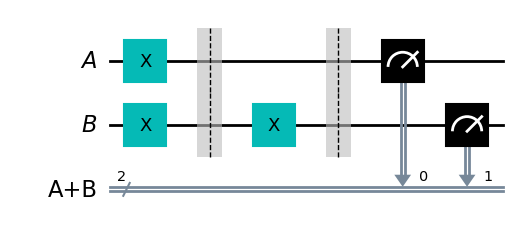

In [3]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 4量子ビット、測定した結果は2つの量子回路を作成
A = QuantumRegister(1, "A")
B = QuantumRegister(1, "B")
output = ClassicalRegister(2, "A+B")
qc = QuantumCircuit(A, B, output)

# 入力値設定
qc.x(0) # 1を設定（初期値が0なので1になる）
qc.x(1) # 1を設定（初期値が0なので1になる）

# 回路
qc.barrier()
qc.x(1)
qc.barrier()

# 結果計測
qc.measure([0, 1], [0, 1])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"出力値: '{k[::-1]}', 取得回数: {v}回")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford")

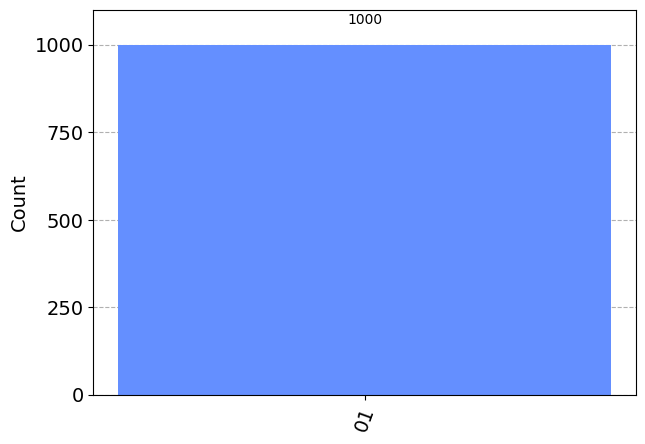

In [ ]:
# 観測結果をグラフで表示
plot_histogram(counts)

入力値を直接取得することはここではできませんが、\
結果から入力が "11" の場合に "10" を出力することができました。

## **2. 重ね合わせの性質を用いて足し算回路を作成してみよう**
ここでは重ね合わせの性質を用いた足し算回路の実装方法について説明します。\
重ね合わせの性質については第一回で $\left|0\right>$ と $\left|1\right>$ の間の " ? " の状態で表現していました。

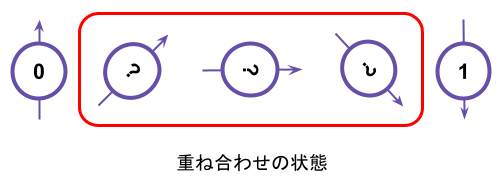

この重ね合わせの状態を作成する方法は多々ありますが、今回はその中でもHゲートを用いて作成します。\
1量子ビット $\left|0\right>$ に Hゲートを施すと以下のような状態になります。

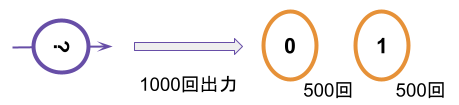

このとき図から矢印が真横になり、観測した際には50%の確率で "0", "1" が出力されます。\
次に2量子ビットの場合を考えます。各量子ビット $\left|0\right>$ にそれぞれ Hゲートを施します。

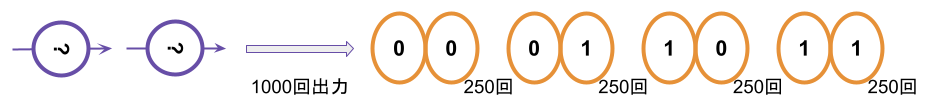

このとき図から各量子ビットの矢印が真横になり、観測した際には25%の確率で "00", "01", "10", "11" が出力されます。

### **pythonを用いた確認**
上で表した状態を実装してみます。

観測回数: 1000回
取得した値: '01', 取得回数: 242回
取得した値: '11', 取得回数: 254回
取得した値: '00', 取得回数: 259回
取得した値: '10', 取得回数: 245回


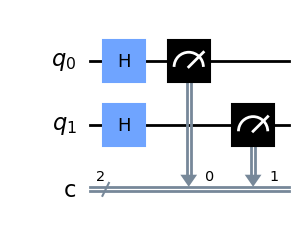

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 量子回路を作成
# 数字は量子ビットをいくつ使うかを指定します。
qc = QuantumCircuit(2, 2)

# Step1. 量子ビットゲートで演算を行う。
# 数字は量子ビットゲートを何番目の量子ビットに作用させるかを指定します。
qc.h(0)
qc.h(1)

# Step2. 観測して値を取得する。
qc.measure([0, 1], [0, 1])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    print(f"取得した値: '{k}', 取得回数: {v}回")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford")

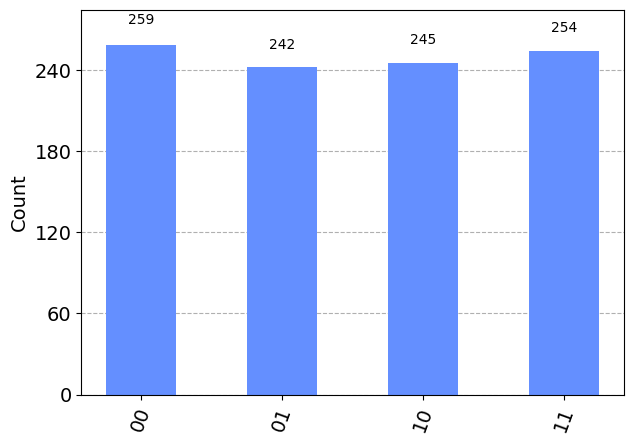

In [ ]:
# 観測結果をグラフで表示
plot_histogram(counts)

### **重ね合わせの性質を用いた足し算回路**
第一回では、量子コンピュータの計算は2つのステップでできることを説明しました。

1. 量子ビットゲートで演算を行う
2. 観測して値を取得する。

この流れをもとに考えます。

<!-- 今回の量子回路は、入力に2量子ビット、出力に2量子ビット使うため、合計4量子ビットを用意する。
回路の手前2つのCNOT(cx)は1桁目の加算回路。CNOTは制御量子ビット（今回は入力）が1の場合だけ出力（今回は出力の1桁目）のビットを反転する。
3つ目のToffoli(ccx)は2つの量子ビットのAND結果が出力（今回は出力の2桁目）になる。 -->

2つの量子ビットを A, B とします。このとき量子ビット $\left|0\right>$, $\left|1\right>$ をそれぞれ割り当てる組み合わせは以下のようになります。

| 量子ビット A | 量子ビット B | Aの観測後 | Bの観測後 |
|:-:|:-:|:-:|:-:|
| $\left|1\right>$ | $\left|1\right>$ | 1 | 1 |
| $\left|1\right>$ | $\left|0\right>$ | 1 | 0 |
| $\left|0\right>$ | $\left|1\right>$ | 0 | 1 |
| $\left|0\right>$ | $\left|0\right>$ | 0 | 0 |

Aの観測後とBの観測後を見ると、古典ビットの足し算の始めの状態を同じものができることがわかります。\
これらの組み合わせを初期状態として観測後が古典ビットの場合の A+B の値になるようにすることを考えます。

これを実現するためには、以下の表の結果になるように A, B に何らかの量子ビットゲートを施す必要があります。

| 量子ビット A | 量子ビット B | 量子ビットゲートを施した後の量子ビット A | 量子ビットゲートを施した後の量子ビット B | 観測後2桁目 | 観測後1桁目 |
|:-:|:-:|:-:|:-:|:-:|:-:|
| $\left|1\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|0\right>$ | 1 | 0 |
| $\left|1\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|1\right>$ | 0 | 1 |
| $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|1\right>$ | 0 | 1 |
| $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | 0 | 0 |

量子ビットゲートを施した後の量子ビット A に関して、古典ビットではANDで表現することができました。\
量子ビットゲートでは以下で紹介する CCX ゲートを用いると表現することができます。

#### **CCXゲート（Toffoliゲート）**
第一回の講座では1量子ビットゲートの X, H ゲートと2量子ビットゲートの CX ゲートについて説明しました。\
ここでは新しく3量子ビットゲートである **CCX ゲート**について紹介します。

3つの内2つの量子ビットが $\left|1\right>$ の場合、残り1つの量子ビットにXゲートを作用させる量子ビットゲートです。\
CX ゲートの制御ビットの部分をもう1つ増やしたものになります。

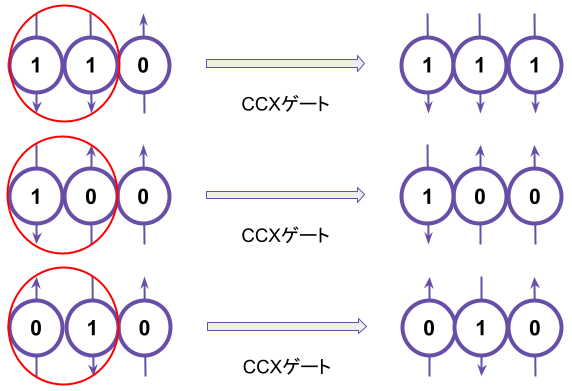

この量子ビットゲートは別名**トフォリゲート（Toffoli）**とも呼び、よく用いられます。

制御量子ビットをA, B。ターゲット量子ビットをCとすると、以下の表のようになります。

| 制御ビットA | 制御ビットB | ターゲットビットC | CCXゲート操作後のA | CCXゲート操作後のB | CCXゲート操作後のC | 観測後 |
|        :-:       |        :-:       |        :-:       |        :-:       |:-:|:-:|:-:|
| $\left|1\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|0\right>$ | 110 |
| $\left|1\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|1\right>$ | 111 |
| $\left|1\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|1\right>$ | 101 |
| $\left|1\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|0\right>$ | 100 |
| $\left|0\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|1\right>$ | 011 |
| $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | 010 |
| $\left|0\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|1\right>$ | 001 |
| $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | 000 |

#### **A + B の 2桁目**
3つの量子ビットの内、ターゲット量子ビットが $\left|0\right>$ の場合、CCXゲートを施すと以下の表になります。

| 制御ビットA | 制御ビットB | ターゲットビットC | CCXゲート操作後のA | CCXゲート操作後のB | CCXゲート操作後のC | 観測後のC |
|        :-:       |        :-:       |        :-:       |        :-:       |:-:|:-:|:-:|
| $\left|1\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|1\right>$ | 1 |
| $\left|1\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|0\right>$ | 0 |
| $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | 0 |
| $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | 0 |

このとき、最後のターゲットビットCのみを観測をすると古典ビットのANDで出力した値と同じものになることがわかります。\
以上のことからCCXゲートを用いてA + B の 2桁目を表現することができました。

#### **A + B の 1桁目**
次にA + B の 1桁目を量子ビットで表現してみます。\
古典ビットではビット演算 XOR を用いましたが、量子ビットではCXゲートを用いることで実現できます。

| 制御ビットA | ターゲットビットB | CXゲート操作後のA | CXゲート操作後のB | 観測後のB |
|        :-:       |        :-:       |        :-:       |        :-:       |:-:|
| $\left|1\right>$ | $\left|1\right>$ | $\left|1\right>$ | $\left|0\right>$ | 0 |
| $\left|1\right>$ | $\left|0\right>$ | $\left|1\right>$ | $\left|1\right>$ | 1 |
| $\left|0\right>$ | $\left|1\right>$ | $\left|0\right>$ | $\left|1\right>$ | 1 |
| $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | $\left|0\right>$ | 0 |

このとき、ターゲットビットBのみを観測をすると A + B の 1桁目を表現することができます。

以上の流れから A + B を量子計算で表現できました。

### **量子回路の実装**
量子ビットの足し算について量子ゲートを用いて表現することができたので、実際に量子回路を作成して結果を見てみます。

観測回数: 1000回
入力値: '10', 出力値: '01', 取得回数: 255回, 確認: 1 + 0 = 01
入力値: '11', 出力値: '10', 取得回数: 232回, 確認: 1 + 1 = 10
入力値: '01', 出力値: '01', 取得回数: 270回, 確認: 0 + 1 = 01
入力値: '00', 出力値: '00', 取得回数: 243回, 確認: 0 + 0 = 00


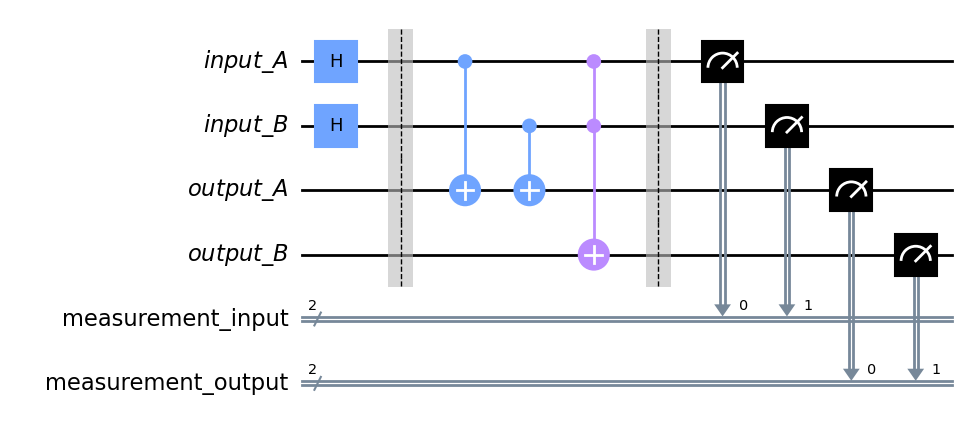

In [ ]:
# おまじない（qiskitをインポートする。）
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# 4量子ビット、測定した結果は2つの量子回路を作成
A = QuantumRegister(1, "input_A")
B = QuantumRegister(1, "input_B")
after_A = QuantumRegister(1, "output_A")
after_B = QuantumRegister(1, "output_B")
cr_input = ClassicalRegister(2, "measurement_input")
cr_output = ClassicalRegister(2, "measurement_output")
qc = QuantumCircuit(A, B, after_A, after_B, cr_input, cr_output)

# 入力値設定
qc.h(0) # 1を設定（初期値が0なので1になる）
qc.h(1) # 1を設定（初期値が0なので1になる）

# 回路
qc.barrier()
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.barrier()

# 結果計測
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
shots = 1000

# おまじない（計算を実行して値を取得する。 ）
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts(compiled_circuit)
print(f"観測回数: {shots}回")
for k, v in counts.items():
    k1, k2 = k.split(" ")
    print(f"入力値: '{k2}', 出力値: '{k1}', 取得回数: {v}回, 確認: {k2[0]} + {k2[1]} = {k1}")

# おまじない（作成した量子回路を画像で表示する。）
qc.draw("mpl", style="clifford")

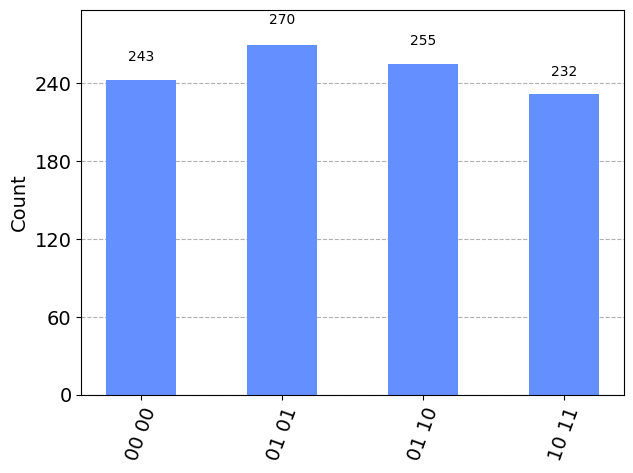

In [ ]:
# 観測結果をグラフで表示
plot_histogram(counts)

### **重ね合わせの性質を用いた回路の応用方法について**
先ほどの回路では重ね合わせの性質を用いることで4つの組み合わせを一度に計算することができました。\
これによって一度に複数の組み合わせを出力することが可能になりますが、一方でそれらの出力は必ずしも全て必要であるとは限りません。

#### **全ての組み合わせを出力する場合の問題点**
例えば今回の場合「1+1の答えのみほしい」、「答えが一桁になる場合のみ欲しい」、「答えが二桁になる場合のみ欲しい」のような条件が含む場合です。

「1+1の答えのみほしい」という場合は他の3通りの出力は必要ありません。\
「答えが一桁になる場合のみ欲しい」、「答えが二桁になる場合のみ欲しい」という場合は他の2通りの出力は必要ありません。

これらの解決策の一つとしては4通り出力してその後に古典コンピュータを用いて条件によって振り分ける方法があります。\
この考え方は非常にわかりやすいですが問題点があります。\
この方法では出力した全ての組み合わせを古典コンピュータで振り分けていますが、古典コンピュータのみの場合も全ての組み合わせの計算をして、条件に応じて振り分けを行います。\
つまり、一度に複数の組み合わせを出力する量子コンピュータが活かせていないことがわかります。

#### **条件に応じた組み合わせのみを出力**

この解決策としては条件に応じた組み合わせのみを出力する方法があります。\
先ほどの例の場合では「1+1の答えのみ」「答えが一桁になる場合のみ」「答えが二桁になる場合のみ」が出力されるような量子回路を作成することになります。

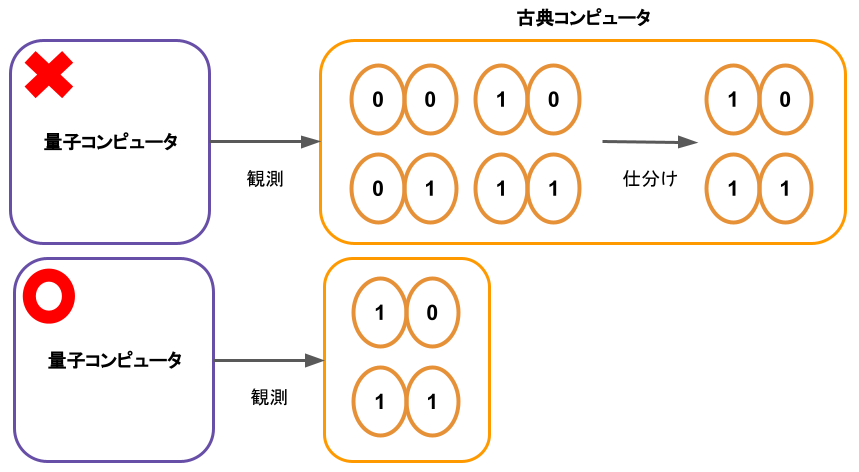

このような量子回路を作成するには条件に合致するように量子回路に "当たり" をつけて出力を絞るのですが、詳細についてはアドバンスコースで説明するのでここでは割愛します。

## **3. 演習 & 考察**
ここでは 1, 2 の内容をもとに演習を行なっていきます。

### **演習1**
1. 引き算回路を実装してみよう。
2. 重ね合わせの性質を用いて引き算回路を実装してみよう。

#### **1. 引き算回路を実装してみよう。**

#### **2. 重ね合わせの性質を用いて引き算回路を実装してみよう。**

### **演習2（難）**
足し算回路では2つの入力の和の計算を行いました。\
この回路を応用して、入力が3つの場合の足し算回路を実装してみよう。

この問題は2020年の IBMQuantumChallenge にて [Learning Exercise I-A](https://github.com/qiskit-community/IBMQuantumChallenge2020/blob/iqx/exercises/week-1/ex_1a_en.ipynb) として出題された問題です。


## **参考文献 & ツール**


*   [IBM Quantumで学ぶ量子コンピュータ](https://amzn.asia/d/16wLqBQ)
*   [Qiskit (Version-0.45.0)](https://qiskit.org/)
*   [IBM Quantum (IBM社)](https://quantum-computing.ibm.com/)
*   [Qplat (DEVEL社)](http://qplat-education.devel-q.com/)

## **その他**
著者: 比嘉恵一朗（DEVEL株式会社）、外林俊介\
この講座内容の著作権は全て[一般社団法人日本量子コンピューティング協会](https://www.jqca.org/)に帰属しています。